In [85]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
from statsmodels.tools.eval_measures import rmse

df = pd.read_csv('/Users/alanchan/Documents/UCL/Year 4/ELEC0088/SNS assignment 22-23/London Weather data/london_weather.csv')
print(df.info())
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13843 entries, 0 to 13842
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              13843 non-null  int64  
 1   cloud_cover      

In [86]:
# print(df.tail())
df = df.rename(columns={'mean_temp': 'y', 'date':'ds'})
df = df[-2000:]
# df=df[["date","mean_temp","pressure"]]
# df.columns = ['ds','y',"pressure"]
df['ds'] = pd.to_datetime(df['ds'], format='%Y%m%d')
print(df.tail())

              ds  cloud_cover  sunshine  global_radiation  max_temp    y  \
13838 2019-12-27          8.0       0.0              12.0       9.6  7.5   
13839 2019-12-28          8.0       0.0              12.0       9.9  8.1   
13840 2019-12-29          6.0       2.2              29.0      11.5  8.7   
13841 2019-12-30          0.0       3.6              37.0       9.3  6.5   
13842 2019-12-31          7.0       0.0              13.0       9.4  7.1   

       min_temp  precipitation  pressure  snow_depth  
13838       6.6            0.0  102880.0         0.0  
13839       6.6            0.0  103630.0         0.0  
13840       7.4            0.0  103360.0         0.0  
13841       1.5            0.0  102970.0         0.0  
13842       4.9            0.0  103160.0         0.0  


In [87]:
df.sort_values(by='ds', inplace = True)
df.reset_index(drop=True, inplace=True)
# print(df.head())
print(df.tail())

             ds  cloud_cover  sunshine  global_radiation  max_temp    y  \
1995 2019-12-27          8.0       0.0              12.0       9.6  7.5   
1996 2019-12-28          8.0       0.0              12.0       9.9  8.1   
1997 2019-12-29          6.0       2.2              29.0      11.5  8.7   
1998 2019-12-30          0.0       3.6              37.0       9.3  6.5   
1999 2019-12-31          7.0       0.0              13.0       9.4  7.1   

      min_temp  precipitation  pressure  snow_depth  
1995       6.6            0.0  102880.0         0.0  
1996       6.6            0.0  103630.0         0.0  
1997       7.4            0.0  103360.0         0.0  
1998       1.5            0.0  102970.0         0.0  
1999       4.9            0.0  103160.0         0.0  


2000


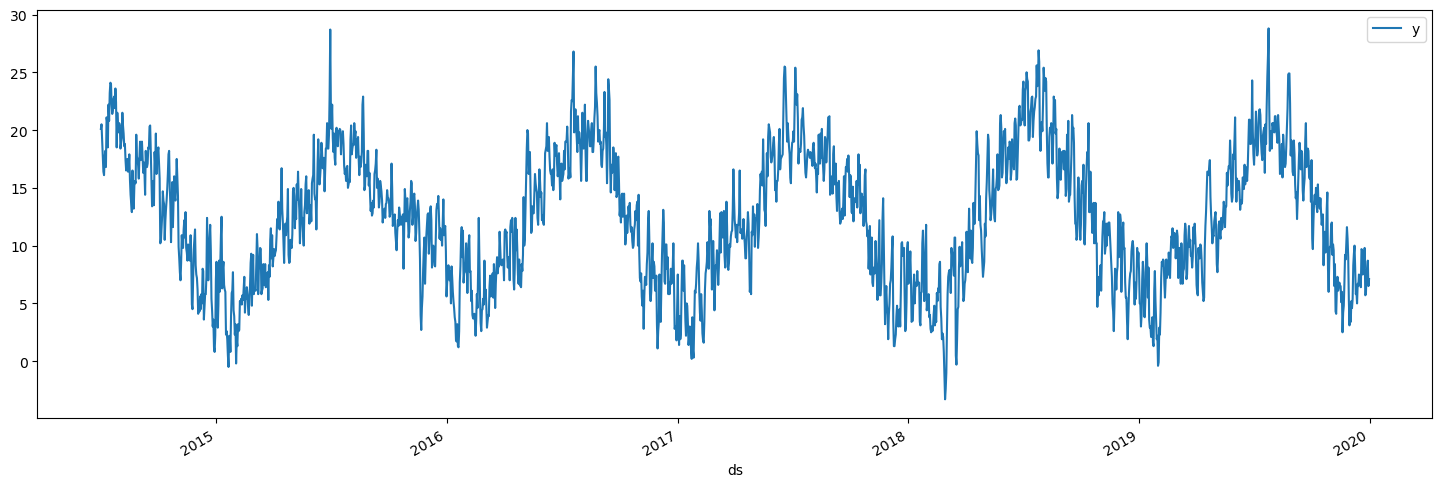

In [88]:
df.plot(x='ds',y='y',figsize=(18,6))
print(len(df))

In [89]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

print(len(train))
print(len(test))

print(df.tail())

1635
365
             ds  cloud_cover  sunshine  global_radiation  max_temp    y  \
1995 2019-12-27          8.0       0.0              12.0       9.6  7.5   
1996 2019-12-28          8.0       0.0              12.0       9.9  8.1   
1997 2019-12-29          6.0       2.2              29.0      11.5  8.7   
1998 2019-12-30          0.0       3.6              37.0       9.3  6.5   
1999 2019-12-31          7.0       0.0              13.0       9.4  7.1   

      min_temp  precipitation  pressure  snow_depth  
1995       6.6            0.0  102880.0         0.0  
1996       6.6            0.0  103630.0         0.0  
1997       7.4            0.0  103360.0         0.0  
1998       1.5            0.0  102970.0         0.0  
1999       4.9            0.0  103160.0         0.0  


In [90]:
def preprocessing (multi_var,periods):
    t = train[['ds',multi_var]]
    t = t.rename(columns={multi_var: 'y', 'date':'ds'})
    model = Prophet()
    model.fit(t)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast['yhat']

periods = 365*2

pressure = preprocessing('pressure',periods)
cloud_cover = preprocessing('cloud_cover',periods)
sunshine = preprocessing('sunshine',periods)
global_radiation = preprocessing('global_radiation',periods)
precipitation = preprocessing('precipitation',periods)
snow_depth = preprocessing('snow_depth',periods)

18:44:49 - cmdstanpy - INFO - Chain [1] start processing
18:44:49 - cmdstanpy - INFO - Chain [1] done processing
18:44:50 - cmdstanpy - INFO - Chain [1] start processing
18:44:50 - cmdstanpy - INFO - Chain [1] done processing
18:44:50 - cmdstanpy - INFO - Chain [1] start processing
18:44:50 - cmdstanpy - INFO - Chain [1] done processing
18:44:51 - cmdstanpy - INFO - Chain [1] start processing
18:44:51 - cmdstanpy - INFO - Chain [1] done processing
18:44:51 - cmdstanpy - INFO - Chain [1] start processing
18:44:51 - cmdstanpy - INFO - Chain [1] done processing
18:44:52 - cmdstanpy - INFO - Chain [1] start processing
18:44:52 - cmdstanpy - INFO - Chain [1] done processing


In [91]:
m = Prophet()
m.add_regressor('pressure')
m.add_regressor('cloud_cover')
m.add_regressor('sunshine')
m.add_regressor('global_radiation')
m.add_regressor('precipitation')
m.add_regressor('snow_depth')

m.fit(train)

future = m.make_future_dataframe(periods=periods) #MS for monthly, H for hourly

# print(future.tail())
future['pressure'] = pressure
future['cloud_cover'] = cloud_cover
future['sunshine'] = sunshine
future['global_radiation'] = global_radiation
future['precipitation'] = precipitation
future['snow_depth'] = snow_depth

18:44:52 - cmdstanpy - INFO - Chain [1] start processing
18:44:52 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2360,2020-12-26,8.611874,4.932949,11.957159
2361,2020-12-27,8.526667,5.153941,11.960310
2362,2020-12-28,8.281337,4.872726,11.692360
2363,2020-12-29,8.235596,5.091087,11.763339
2364,2020-12-30,8.114814,4.683375,11.602405


In [93]:
plot_plotly(m ,forecast)

In [94]:
plot_components_plotly(m, forecast)

In [95]:
predictions = forecast.iloc[len(train):len(train)+len(test)]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

2000    7.553564
2001    7.495879
2002    7.223789
2003    7.068871
2004    6.947381
          ...   
2360    8.611874
2361    8.526667
2362    8.281337
2363    8.235596
2364    8.114814
Name: yhat, Length: 365, dtype: float64
Root Mean Squared Error between actual and  predicted values:  2.8159865680387073
Mean Value of Test Dataset: 12.193972602739736


In [96]:
training = forecast.iloc[:len(train)]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(training,train['y']))

Root Mean Squared Error between actual and  predicted values:  2.7191810027462497
